In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Energy.csv', sep=';')

1. Realice la búsqueda de un conjunto de datos de mínimo 1000 registros, donde pueda obtener
información correspondiente al sector asignado y al cual se le pueda aplicar el método de RBNN.
Adjunte enlace de acceso al dataset (enlace de la página de donde obtuvo los datos)
https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather?select=weather_features.csv

In [3]:
df.head(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


2. Realice la lectura del banco de datos e imprima las categorías que �ene y cuales son las variables
dependientes e independientes.


In [4]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

En el caso particular de mi objetivo con este data set la variable dependiente sería 'price actual', al querer predecir el precio de la electricidad con las demas variables que mas convengan.

3. Realice el proceso de limpieza de los datos, jus�ficando cada una de las etapas u�lizadas.
4. Para el caso de datos nulos o no válidos, realice el análisis de cuál es el mejor procedimiento para
realizar el tratamiento de esos datos y jus�fique cada uno de los procedimientos u�lizados.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [6]:
del df['forecast wind offshore eday ahead']
del df['generation hydro pumped storage aggregated']
df.head(5)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [7]:
import numpy as np
df[df['generation fossil gas'].isnull()]

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
99,2015-01-05 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,546.0,8233.0,21912.0,21182.0,35.20,59.68
108,2015-01-05 12:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3932.0,9258.0,23209.0,NaN,35.50,79.14
109,2015-01-05 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4236.0,9156.0,23725.0,NaN,36.80,73.95
110,2015-01-05 14:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4215.0,9072.0,23614.0,NaN,32.50,71.93
111,2015-01-05 15:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4050.0,8779.0,22381.0,NaN,30.00,71.50
112,2015-01-05 16:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3728.0,8426.0,21371.0,NaN,30.00,71.85
113,2015-01-05 17:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3175.0,7946.0,20760.0,NaN,30.60,80.53
451,2015-01-19 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,91.0,6434.0,38642.0,39304.0,70.01,88.95
452,2015-01-19 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28.0,6907.0,38758.0,39262.0,69.00,87.94
643,2015-01-27 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,182.0,9807.0,38968.0,38335.0,66.00,83.97


In [8]:
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35017 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35017 non-null  object 
 1   generation biomass                           35017 non-null  float64
 2   generation fossil brown coal/lignite         35017 non-null  float64
 3   generation fossil coal-derived gas           35017 non-null  float64
 4   generation fossil gas                        35017 non-null  float64
 5   generation fossil hard coal                  35017 non-null  float64
 6   generation fossil oil                        35017 non-null  float64
 7   generation fossil oil shale                  35017 non-null  float64
 8   generation fossil peat                       35017 non-null  float64
 9   generation geothermal                        35017 non-null  float64
 10

In [9]:
percentiles = [33, 66]  # 33% para "bajo", 33-66% para "medio", 66-100% para "alto"
lower_limit = np.percentile(df2['price actual'], percentiles[0])
upper_limit = np.percentile(df2['price actual'], percentiles[1])

# Categorizar los precios en función de los límites y crear la nueva columna
def categorize_price(price):
    if price <= lower_limit:
        return "bajo"
    elif price <= upper_limit:
        return "medio"
    else:
        return "alto"

df2['Price Category'] = df2['price actual'].apply(categorize_price)
df2.head(2)

<ipython-input-9-532b5eb40767>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price Category'] = df2['price actual'].apply(categorize_price)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,Price Category
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,alto
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,alto


Desrrollé el tercer y cuarto punto en los anteriores bloques de código. En primer lugar imprimo la informacion general de mis datos, encontrando principalmente dos columnas que serían posteriormente eliminadas del dataset original, al no tener resgistro alguno. En segundo lugar observo con el tema de datos nulos un pequeño patrón; en cada una de mis variables hay alrededor de 20 nulos, lo que me lleva a pensar que son registros particulares en los que sus atributos coinciden en estar casi todos completamente vacios, por ende imprimo los datos nulos de una columna cualquiera comprobando lo anterior y eliminando todos estos en un df copia. Por ultimo creo una nueva columna para categorizar en rangos los precios.

7. En caso de ser necesario transforme los atributos categóricos a numéricos. Explique la elección del
método u�lizado para su conjunto de datos.

In [10]:
category_mapping = {'bajo': 0, 'medio': 1, 'alto': 2}

# Codificar las categorías en el DataFrame
df2['Price Category'] = df2['Price Category'].map(category_mapping)
df2.head(2)

<ipython-input-10-1c4097fe5c88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price Category'] = df2['Price Category'].map(category_mapping)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,Price Category
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,2
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,2


Solo reemplazo los valores de la columna original por 0,1,2 tanto para ver la correlacion como para usar estos valores en el modelo.

5. Realice un análisis de correlación y determine cuales de las variables del conjunto de datos �ene
correlación con la variable obje�vo, jus�fique su respuesta.

In [12]:
corr_matrix = df2.corr()
corr_matrix['Price Category']

<ipython-input-12-e4b5fa43224e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr()


generation biomass                             0.133253
generation fossil brown coal/lignite           0.333373
generation fossil coal-derived gas                  NaN
generation fossil gas                          0.417587
generation fossil hard coal                    0.424193
generation fossil oil                          0.242111
generation fossil oil shale                         NaN
generation fossil peat                              NaN
generation geothermal                               NaN
generation hydro pumped storage consumption   -0.380057
generation hydro run-of-river and poundage    -0.078443
generation hydro water reservoir               0.101336
generation marine                                   NaN
generation nuclear                            -0.087845
generation other                               0.107477
generation other renewable                     0.209293
generation solar                               0.096887
generation waste                               0

Realmente casi todas las variables tienen correlacion con mi variable objetivo en menor o mayor medida (quienes no son datos en 0), pero decido tomas en mi tensor x aquellas mayores al 30%, teniendo un impacto reducido pero trabajable.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [77]:
X = df2[['generation fossil brown coal/lignite','generation fossil gas','generation fossil hard coal','generation fossil oil',
        'generation hydro pumped storage consumption','generation other renewable','total load forecast',
        'total load actual','price day ahead']]
y = df2['Price Category'].values

8. Para el conjunto de datos de entrenamiento realice el escalado del conjunto (normalización o
estandarización) realice la jus�ficación del método seleccionado para su conjunto de datos.

In [78]:
min_val = np.min(X)
max_val = np.max(X)
X = (X - min_val) / (max_val - min_val)
X = np.array(X)
print(X)

[[0.32932933 0.24178896 0.57674363 ... 0.34412712 0.31966571 0.48073652]
 [0.32832833 0.25935909 0.56884795 ... 0.29327893 0.27600766 0.46072251]
 [0.32332332 0.24243786 0.54803206 ... 0.23233842 0.2042744  0.45301711]
 ...
 [0.         0.35065389 0.28974758 ... 0.42078591 0.43658048 0.64865406]
 [0.         0.32754318 0.27431511 ... 0.31543912 0.33777313 0.61913339]
 [0.         0.34571229 0.2591219  ... 0.27137642 0.27918517 0.62253578]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Encuentro que para algoritmos de clusterizacion es más util usar la normalizacion, ya que al tener las caracteristicas en un rango similar se facilitan los agrupamientos.

In [79]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = y.reshape(-1,1)
print(y.shape)
y = ohe.fit_transform(y).toarray()
y

(35017, 1)


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

6. Divida el conjunto de datos así, 80% entrenamiento y 20% pruebas.


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28013, 9)
(7004, 9)
(28013, 3)
(7004, 3)


9. Realice la implementación de la RBNN en su conjunto de datos, Defina la taza de aprendizaje y el
error en 0.01 y 1e-7 respec�vamente, jus�fique la técnica u�lizada para definir el número de
centroides

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

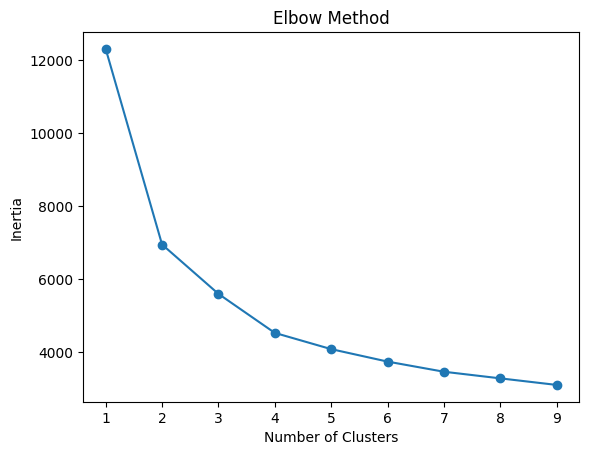

In [81]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
possible_clusters = range(1, 10)  # Probar diferentes números de clusters

for num_clusters in possible_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar la variación de la inercia
plt.plot(possible_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

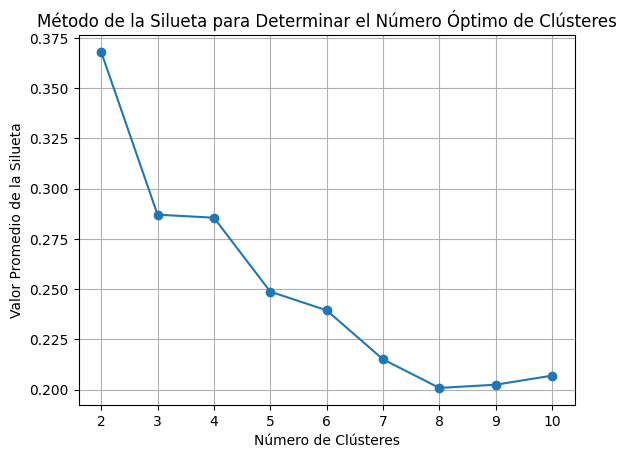

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
num_clusters_to_try = range(2, 11)  # Prueba desde 2 hasta 10 clústeres

for num_clusters in num_clusters_to_try:
    # Aplicar el algoritmo de K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Calcular el valor de la silueta
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar los resultados
plt.plot(num_clusters_to_try, silhouette_scores, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Valor Promedio de la Silueta')
plt.title('Método de la Silueta para Determinar el Número Óptimo de Clústeres')
plt.grid(True)
plt.show()

Utilizo el metodo del codo ya que es el más comun por el tema de la inersia que representa la dispercion de los datos; sin embargo al ver que tiene dos puntos de quiebre notorio utilizo tambien el metodo de la silueta para encontrar de forma mas clara estos clusters.

10. Valide u�lizando el método de validación cruzada por lo menos 3 topologías de la red e imprima los
resultados para cada topología y jus�fique la elección de la topología implementada.

In [82]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import tensorflow as tf
from keras.layers import Input, Layer, Dense
from keras.models import Model
from keras.optimizers import Adam

# Aplicar K-Means para obtener centros para capa intermedia
num_centers = 4
kmeans = KMeans(n_clusters=num_centers, random_state=0)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_

# Calcular las desviaciones estándar para las funciones de activación radiales
distances = euclidean_distances(X_train, centers)
sigma = np.mean(np.std(distances, axis=1))

# Función de activación radial
def radial_activation(x, centers, sigma):
    return tf.exp(-tf.reduce_sum((x - centers)**2, axis=1) / (2 * sigma**2))

# Capa intermedia radial
class RadialLayer(Layer):
    def __init__(self, centers, sigma, **kwargs):
        super(RadialLayer, self).__init__(**kwargs)
        self.centers = centers
        self.sigma = sigma

    def call(self, inputs):
        radial_outputs = []
        for center in self.centers:
            radial_outputs.append(radial_activation(inputs, center, self.sigma))
        return tf.stack(radial_outputs, axis=1)

# Crear capa intermedia radial
inputs = Input(shape=(9,))
radial_layer = RadialLayer(centers, sigma)(inputs)
print(radial_layer.shape)
print(centers.shape)

# Capa de salida con activación softmax para clasificación
outputs = Dense(3, activation='softmax')(radial_layer)

# Crear el modelo
model = Model(inputs=inputs, outputs=outputs)
learning_rate = 0.01  # Tasa de aprendizaje
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, verbose=0)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(None, 4)
(4, 9)
Loss: 0.9735687971115112
Accuracy: 0.5219874382019043


In [85]:
# Aplicar K-Means para obtener centros para capa intermedia
num_centers = 2
kmeans = KMeans(n_clusters=num_centers, random_state=0)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_

# Calcular las desviaciones estándar para las funciones de activación radiales
distances = euclidean_distances(X_train, centers)
sigma = np.mean(np.std(distances, axis=1))

# Función de activación radial
def radial_activation(x, centers, sigma):
    return tf.exp(-tf.reduce_sum((x - centers)**2, axis=1) / (2 * sigma**2))

# Capa intermedia radial
class RadialLayer(Layer):
    def __init__(self, centers, sigma, **kwargs):
        super(RadialLayer, self).__init__(**kwargs)
        self.centers = centers
        self.sigma = sigma

    def call(self, inputs):
        radial_outputs = []
        for center in self.centers:
            radial_outputs.append(radial_activation(inputs, center, self.sigma))
        return tf.stack(radial_outputs, axis=1)

# Crear capa intermedia radial
inputs = Input(shape=(9,))
radial_layer = RadialLayer(centers, sigma)(inputs)
print(radial_layer.shape)
print(centers.shape)

# Capa de salida con activación softmax para clasificación
outputs = Dense(3, activation='softmax')(radial_layer)

# Crear el modelo
model2 = Model(inputs=inputs, outputs=outputs)
learning_rate = 0.01  # Tasa de aprendizaje
optimizer = Adam(learning_rate=learning_rate)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model2.fit(X_train, y_train, epochs=50, verbose=0)

# Evaluar el modelo
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(None, 2)
(2, 9)
Loss: 1.038051724433899
Accuracy: 0.46873214840888977


In [87]:
# Aplicar K-Means para obtener centros para capa intermedia
num_centers = 20
kmeans = KMeans(n_clusters=num_centers, random_state=0)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_

# Calcular las desviaciones estándar para las funciones de activación radiales
distances = euclidean_distances(X_train, centers)
sigma = np.mean(np.std(distances, axis=1))

# Función de activación radial
def radial_activation(x, centers, sigma):
    return tf.exp(-tf.reduce_sum((x - centers)**2, axis=1) / (2 * sigma**2))

# Capa intermedia radial
class RadialLayer(Layer):
    def __init__(self, centers, sigma, **kwargs):
        super(RadialLayer, self).__init__(**kwargs)
        self.centers = centers
        self.sigma = sigma

    def call(self, inputs):
        radial_outputs = []
        for center in self.centers:
            radial_outputs.append(radial_activation(inputs, center, self.sigma))
        return tf.stack(radial_outputs, axis=1)

# Crear capa intermedia radial
inputs = Input(shape=(9,))
radial_layer = RadialLayer(centers, sigma)(inputs)
print(radial_layer.shape)
print(centers.shape)

# Capa de salida con activación softmax para clasificación
outputs = Dense(3, activation='softmax')(radial_layer)  # Tres clases: 0, 1, 2

# Crear el modelo
model3 = Model(inputs=inputs, outputs=outputs)
learning_rate = 0.01  # Tasa de aprendizaje deseada
optimizer = Adam(learning_rate=learning_rate)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model3.fit(X_train, y_train, epochs=50, verbose=0)

# Evaluar el modelo
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(None, 20)
(20, 9)
Loss: 0.8677139282226562
Accuracy: 0.601370632648468


En la primera tipologia veo ralmente dos momentos en que la inercia hace un cambio 'brusco' por ende uso en un primer momento 4 clusters; para mi segunda tipologia me baso en el metodo de la silueta que muestra su pico mas alto de promedio en 2 clusters; y para la tercera uso un valor alto relativamente aleatorio, en este caso 20.

11. Realice la validación con su conjunto de datos de pruebas, imprima la matriz de confusión si su
ejercicio es de clasificación y explique los resultados. Si su ejercicio es de aproximación de funciones
imprima el error cuadrá�co medio de las predicciones y explique su respuesta.

219/219 [==============================] - 0s 1ms/step


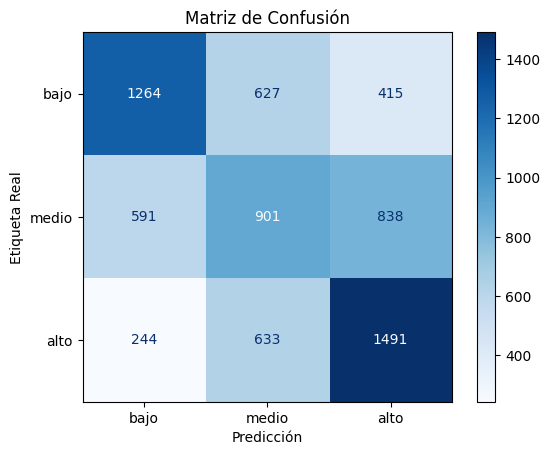

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)  # Si tus etiquetas reales están codificadas como categóricas

#matriz de confusión
confusion = confusion_matrix(y_true, y_pred_classes)

#objeto para visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=['bajo', 'medio', 'alto'])  # Reemplaza con tus etiquetas de clase

#Grafica
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")

plt.show()